<a href="https://colab.research.google.com/github/Sumathi2007/Sumathi2007/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠️ Dataset not found — creating a sample dataset instead.
✅ Sample dataset created as 'email_spam.csv'

--- Dataset Preview ---
                                                text label
0  Congratulations! You have won a free lottery t...  spam
1          Hi friend, are you coming to class today?   ham
2     Claim your free iPhone now!!! Click this link.  spam
3                Meeting postponed to 4 PM tomorrow.   ham
4                Earn money easily!!! Limited offer.  spam

--- After Cleaning ---
                                                text  label
0  congratulations! you have won a free lottery t...      1
1          hi friend, are you coming to class today?      0
2     claim your free iphone now!!! click this link.      1
3                meeting postponed to 4 pm tomorrow.      0
4                earn money easily!!! limited offer.      1

----- Model Evaluation -----
✅ Accuracy: 100.00%

Confusion Matrix:
 [[2 0]
 [0 1]]

Classification Report:
               precision 

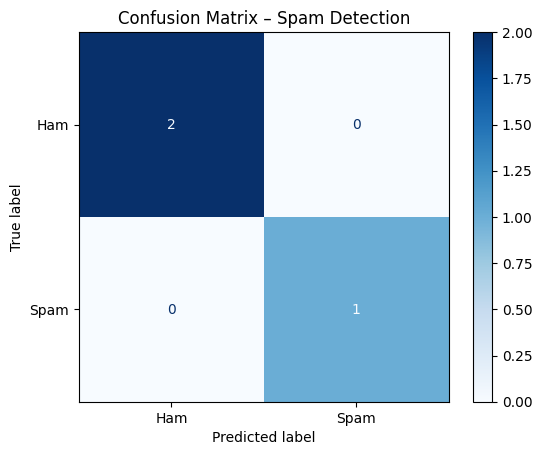


📩 New Email Predictions:
• Congratulations, you won a free gift card! Click n... → SPAM
• Hey, what time is our meeting today?... → HAM
• Earn money fast!!! Join now.... → SPAM


In [10]:
# ================================================
# 🧩 Dnyx Internship (AI) – November 2025
# Task 1: Classification – Spam Detection
# ================================================

# ----------------------------------------
# Step 1: Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# ----------------------------------------
# Step 2: Load or Create Dataset
# ----------------------------------------
# Try to read the given file, otherwise create a sample one
try:
    df = pd.read_csv("email_spam.csv")
    print("✅ Loaded attached dataset (email_spam.csv)")
except FileNotFoundError:
    print("⚠️ Dataset not found — creating a sample dataset instead.")
    data = {
        "text": [
            "Congratulations! You have won a free lottery ticket.",
            "Hi friend, are you coming to class today?",
            "Claim your free iPhone now!!! Click this link.",
            "Meeting postponed to 4 PM tomorrow.",
            "Earn money easily!!! Limited offer.",
            "Let's meet for our group project tomorrow.",
            "Exclusive deal for you! Claim your bonus now.",
            "Hey, did you submit your assignment?",
            "Free coupons waiting! Visit our site now.",
            "Lunch at the canteen today?"
        ],
        "label": ["spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham"]
    }
    df = pd.DataFrame(data)
    df.to_csv("email_spam.csv", index=False)
    print("✅ Sample dataset created as 'email_spam.csv'")

print("\n--- Dataset Preview ---")
print(df.head())

# ----------------------------------------
# Step 3: Data Preprocessing
# ----------------------------------------
# Remove missing values
df.dropna(inplace=True)

# Convert text to lowercase
df["text"] = df["text"].str.lower()

# Encode labels (spam → 1, ham → 0)
df["label"] = df["label"].map({"spam": 1, "ham": 0})

print("\n--- After Cleaning ---")
print(df.head())

# ----------------------------------------
# Step 4: Split Data
# ----------------------------------------
X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------
# Step 5: Text Encoding (Bag of Words)
# ----------------------------------------
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ----------------------------------------
# Step 6: Train Model
# ----------------------------------------
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# ----------------------------------------
# Step 7: Evaluation
# ----------------------------------------
y_pred = model.predict(X_test_vec)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n----- Model Evaluation -----")
print(f"✅ Accuracy: {acc*100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Spam Detection")
plt.show()

# ----------------------------------------
# Step 8: Predict New Examples
# ----------------------------------------
sample_emails = [
    "Congratulations, you won a free gift card! Click now.",
    "Hey, what time is our meeting today?",
    "Earn money fast!!! Join now."
]
sample_vec = vectorizer.transform(sample_emails)
predictions = model.predict(sample_vec)

print("\n📩 New Email Predictions:")
for email, label in zip(sample_emails, predictions):
    print(f"• {email[:50]}... → {'SPAM' if label == 1 else 'HAM'}")
